In [1]:
import covid19sim
import pandas as pd
import numpy as np
import dill
from collections import defaultdict
import datetime
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("agg")
%matplotlib inline

import pdb
ptrace = pdb.set_trace

## Risk to Recommendation level breaking behavior
People can be categorized in the following categories - 

Order 0: 
A - Human is exposed (can be carrying 0 viral load)
B - Human is infectious and pre-symptomatic (alsoincludes asymptomatic)
C - Human is infectious and symptomatic
D - Human is infectious and Tested Positive

Order 1:
Human is not infected but is one-hop away from (had a contact)
E - Exposed person
H - Pre-symptomatic Infectious
I - Symptomatic infectious 
J - Tested positive

K - All others!

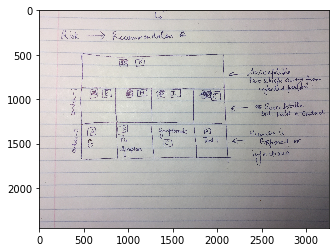

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("_RecBreakdown.JPG")
plt.imshow(image)
plt.show()

In [3]:
filename = "/Users/victor/Downloads/tracker_data_n_200_seed_0_20200509-090220_.pkl"

In [4]:
data = dill.load(open(filename,"rb"))

In [60]:
from collections.abc import Iterable 

print("\n".join("{:35}: {}".format(k, v if not isinstance(v, (list, dict, tuple)) else "{} items".format(len(v))) for k, v in sorted(data.items())))

R                                  : 49 items
avg_infectiousness_per_day         : 49 items
cases_per_day                      : 50 items
contacts                           : 10 items
e                                  : 50 items
ei_per_day                         : 49 items
expected_mobility                  : 50 items
human_monitor                      : 49 items
i                                  : 50 items
infection_monitor                  : 196 items
infector_infectee_update_messages  : 79 items
intervention                       : Tracing
intervention_day                   : 0
mobility                           : 50 items
n_humans                           : 202
n_init_infected                    : 4
r                                  : 50 items
r_0                                : 9 items
risk_attributes                    : 242400 items
risk_model                         : naive
risk_precision                     : 50 items
risk_precision_global              : 3 items
s       

In [58]:
print("\n".join(data['risk_attributes'][0].keys()))

risk
risk_level
rec_level
exposed
infectious
symptoms
test
recovered
order_1_is_exposed
order_1_is_presymptomatic
order_1_is_infectious
order_1_is_symptomatic
order_1_is_tested


In [62]:
len(data["mobility"])

50

In [6]:
risk_attributes = data['risk_attributes']
histograms_risk = defaultdict(list)
histograms_risk_level = defaultdict(list)
histograms_rec_level = defaultdict(list)
for x in risk_attributes:
    KEYS = []
    order_2 = True
    if x['exposed']:
        KEYS.append("A")
        order_2 = False
    
    if x['infectious'] and x['symptoms']==0:
        KEYS.append("B")
        order_2 = False
        
    if x['infectious'] and x['symptoms'] > 0:
        KEYS.append("C")
        order_2 = False
        
    if x['test']:
        KEYS.append("D")
        order_2 = False
        
    if x['order_1_is_exposed']:
        KEYS.append("E")
        order_2 = False
        
    if x['order_1_is_presymptomatic']:
        KEYS.append("H")
        order_2 = False
        
    if x['order_1_is_symptomatic']:
        KEYS.append("I")
        order_2 = False
        
    if x['order_1_is_tested']:
        KEYS.append("J")
        order_2 = False    
    
    if order_2:
        KEYS.append("K")

    for k in KEYS:    
        histograms_risk[k].append(x['risk'])
        histograms_risk_level[k].append(x['risk_level'])
        histograms_rec_level[k].append(x['rec_level'])

In [38]:
d = defaultdict(int)
for r in histograms_risk["A"]:
    d[r] += 1
for k, v in d.items():
    print("{:.3f} : {}".format(k, v))

0.000 : 4211
0.030 : 2655
0.059 : 1763
0.087 : 907
0.115 : 596
0.240 : 193
0.216 : 268
0.141 : 485
0.167 : 258
0.192 : 274
0.386 : 7
0.263 : 108
0.285 : 97
0.306 : 42
0.327 : 58
0.347 : 1
0.367 : 7
0.404 : 4


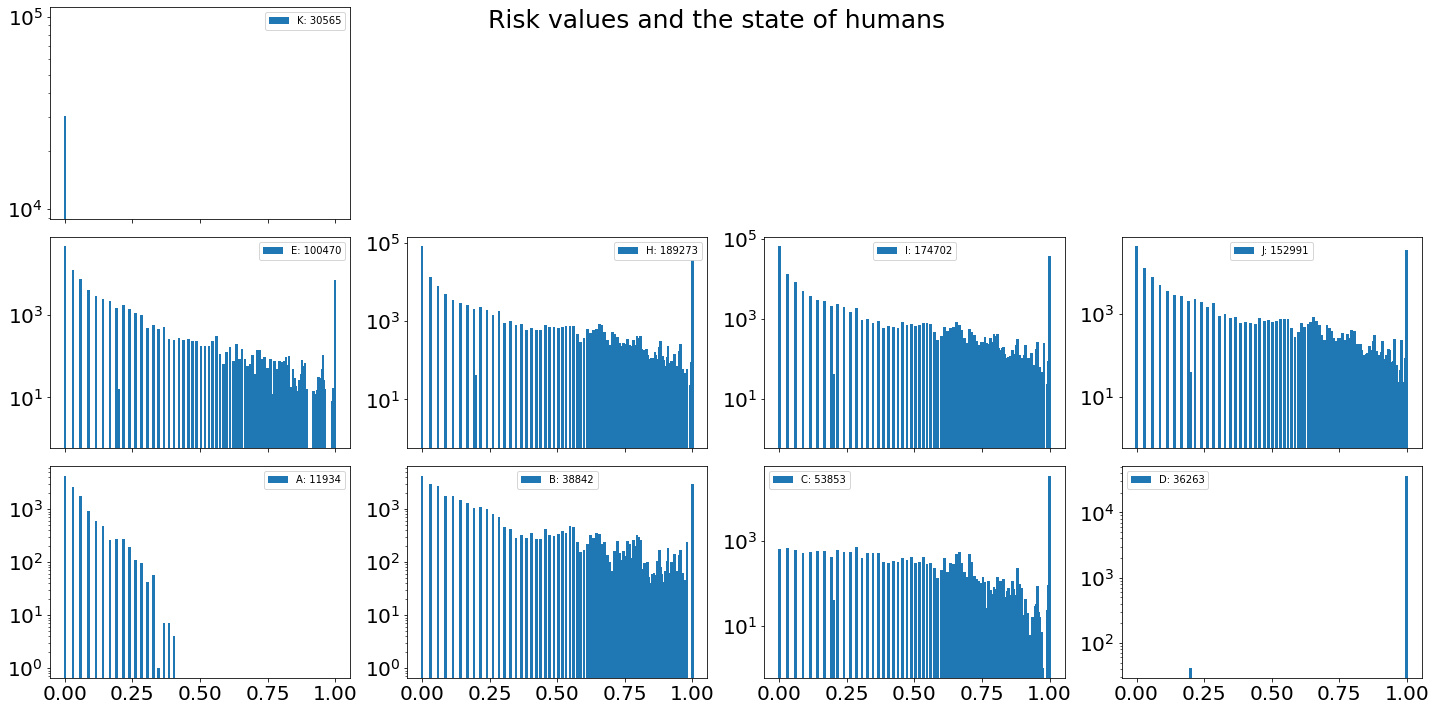

In [57]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20,10), sharex=True)

def _plot(axs, histogram, key):
    d = defaultdict(int)
    for r in histograms_risk[key]:
        d[r] += 1
    bars = axs.bar(d.keys(), d.values(), label='{}: {}'.format(key, len(histograms_risk[key])), width=0.01)
#    for bar in bars:
#        bar.set_edgecolor("grey")
#        bar.set_linewidth(1)
    axs.tick_params(labelsize=20)
#    axs.set_xlim(0,1)
    axs.legend()
    axs.set_yscale('log')
    
_plot(axs[2][0], histograms_risk, "A")
_plot(axs[2][1], histograms_risk, "B")
_plot(axs[2][2], histograms_risk, "C")
_plot(axs[2][3], histograms_risk, "D")

_plot(axs[1][0], histograms_risk, "E")
_plot(axs[1][1], histograms_risk, "H")
_plot(axs[1][2], histograms_risk, "I")
_plot(axs[1][3], histograms_risk, "J")

_plot(axs[0][0], histograms_risk, "K")
[x.set_visible(False) for x in axs[0][1:]]

plt.tight_layout()

_ = fig.suptitle("Risk values and the state of humans", fontsize=25)




In [63]:
category_to_color = {
    "A": "RED",
    "B": "RED",
    "C": "RED",
    "D": "RED",
    "E": "YELLOW",
    "F": "RED",
    "G": "RED",
    "H": "ORANGE",
    "I": "ORANGE",
    "J": "RED",
    "K": "GREEN",
}

In [ ]:
risk_thresholds = [
    0.1, # <  => Green
    0.4, # <  => Yellow
    0.5,
]